### EDA Part 1 - PSM Yearly Solar Data

#### Capstone: Predicting Solar Energy Demand
#### Robert Manriquez

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('./data_psm_raw/Santa_Monica/83160_34.01_-118.46_2016.csv', header = 2)

df['Timestamp'] = pd.to_datetime(df['Year'].astype(str) + "-" + df['Month'].astype(str) + "-" + df['Day'].astype(str) +\
                                                                                " " + df['Hour'].astype(str)+ ":" + df['Minute'].astype(str))
df.drop(['Year','Month', 'Day','Hour','Minute'], axis =1, inplace = True)
df.set_index('Timestamp', inplace = True)

In [4]:
df.head()

DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
Timestamp                                                                      
2016-01-01 00:00:00    0    0    0             0             0             0   
2016-01-01 00:30:00    0    0    0             0             0             0   
2016-01-01 01:00:00    0    0    0             0             0             0   
2016-01-01 01:30:00    0    0    0             0             0             0   
2016-01-01 02:00:00    0    0    0             0             0             0   

                     Cloud Type  Dew Point  Solar Zenith Angle  Fill Flag  \
Timestamp                                                                   
2016-01-01 00:00:00         1.0         -4              169.00          0   
2016-01-01 00:30:00         1.0         -4              166.87          0   
2016-01-01 01:00:00         1.0         -4              162.39          0   
2016-01-01 01:30:00         1.0         -4              156.91          0   
2016-01-01 02:00:00         1.0         -4              151.00          0   

                     Surface Albedo  Wind Speed  Precipitable Water  \
Timestamp                                                             
2016-01-01 00:00:00         0.12592         1.2               0.490   
2016-01-01 00:30:00         0.12592         1.2               0.496   
2016-01-01 01:00:00         0.12592         1.2               0.502   
2016-01-01 01:30:00         0.12592         1.2               0.510   
2016-01-01 02:00:00         0.12592         1.3               0.518   

                     Wind Direction  Relative Humidity  Temperature  Pressure  
Timestamp                                                                      
2016-01-01 00:00:00           227.8              51.56            5    1010.0  
2016-01-01 00:30:00           227.8              51.56            5    1010.0  
2016-01-01 01:00:00           239.7              51.08            5    1010.0  
2016-01-01 01:30:00           239.7              51.08            5    1010.0  
2016-01-01 02:00:00           237.4              50.88            5    1010.0

In [6]:
SM_2016_months = df.resample('M').mean().copy()
SM_2016_weeks = df.resample('W').mean().copy()
SM_2016_days = df.resample('D').mean().copy()

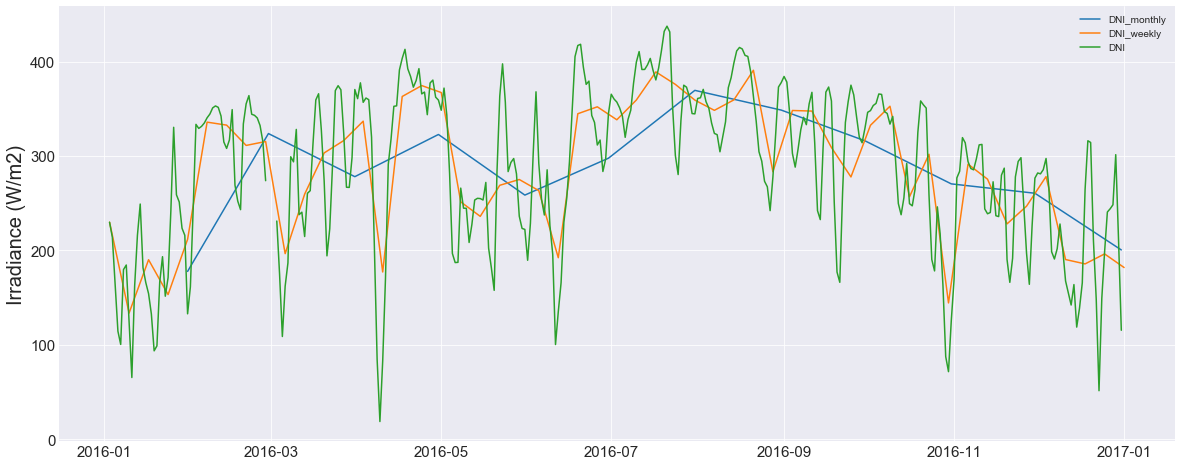

In [7]:
x_list = np.arange(0, df.shape[0])

plt.figure(figsize = (20,8))
plt.plot(SM_2016_months['DNI'], label = 'DNI_monthly')
plt.plot(SM_2016_weeks['DNI'], label = 'DNI_weekly')
plt.plot(SM_2016_days['DNI'].rolling(3).mean(), label = 'DNI')

plt.ylabel('Irradiance (W/m2)', fontsize = 20)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.legend()

In [8]:
example_week = df.resample('H').max().iloc[0:168]

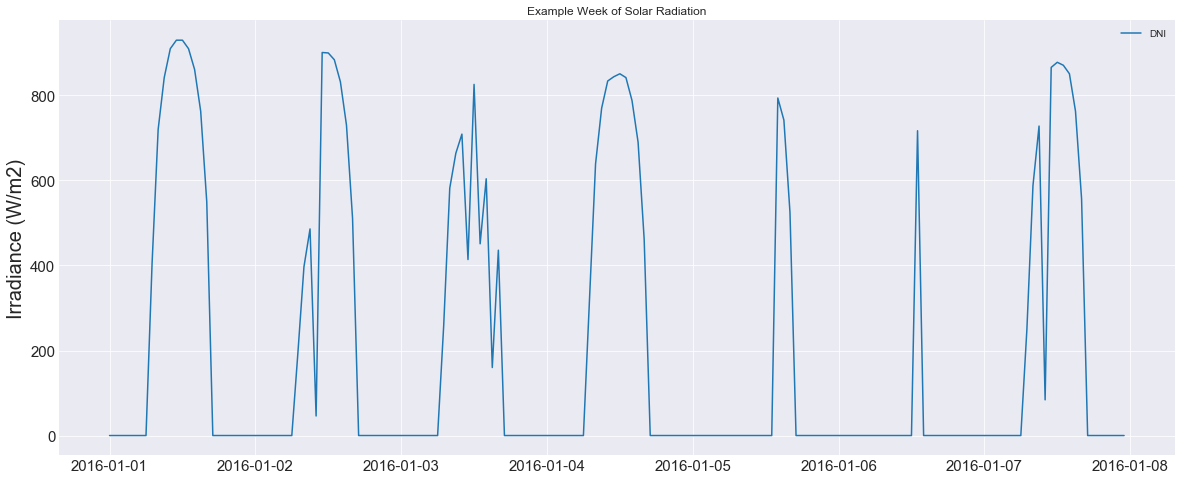

In [10]:
plt.figure(figsize = (20,8))

plt.plot(example_week['DNI'], label = 'DNI')

plt.ylabel('Irradiance (W/m2)', fontsize = 20)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.title('Example Week of Solar Radiation')
plt.legend()

- The average solar irradiance (DNI, Direct Normal Irradiance) is tricky, and requires a few rules to really define.  Since the sunlight a solar panel experiences is cyclical with the rising and setting of the sun, it's power generated will be the high at mid-day, lowest in the early morning and late night, and zero between sunset and sunrise.  Due to the cyclical signal, the value is usually expressed as an average over a specified time period, and needs to be considered when converting from irradiance to power generated.

##### Using NREL's database, it's possible to obtain yearly DNI averages per global coordinate using the signals recorded from each weather station NREL collects data from.  However, I'll need to figure out a way to combine all of the yearly DNI averages, tag the station/coordinates, and have the data aggregated historically such that I can make predictions based of the previous year's DNI per location.

In [11]:
sm_2001 = pd.read_csv('./data_psm_raw/Santa_Monica/83160_34.01_-118.46_2001.csv',header = 2)
sm_2007 = pd.read_csv('./data_psm_raw/Santa_Monica/83160_34.01_-118.46_2007.csv',header = 2)
sm_2012 = pd.read_csv('./data_psm_raw/Santa_Monica/83160_34.01_-118.46_2012.csv',header = 2)
sm_2013 = pd.read_csv('./data_psm_raw/Santa_Monica/83160_34.01_-118.46_2013.csv',header = 2)
sm_2014 = pd.read_csv('./data_psm_raw/Santa_Monica/83160_34.01_-118.46_2014.csv',header = 2)
sm_2015 = pd.read_csv('./data_psm_raw/Santa_Monica/83160_34.01_-118.46_2015.csv',header = 2)
sm_2016 = pd.read_csv('./data_psm_raw/Santa_Monica/83160_34.01_-118.46_2016.csv',header = 2)

In [12]:
sm_list = [sm_2001, sm_2007, sm_2012, sm_2013, sm_2014,sm_2015,sm_2016]

for item in sm_list:
    item['Timestamp'] = pd.to_datetime(item['Year'].astype(str) + "-" + item['Month'].astype(str) + "-" + item['Day'].astype(str) +\
                                                                                " " + item['Hour'].astype(str)+ ":" + item['Minute'].astype(str))
    item.drop(['Year','Month', 'Day','Hour','Minute'], axis =1, inplace = True)
    item.set_index('Timestamp', inplace = True)

In [13]:
sm_2001.head()

DHI  DNI  GHI  Clearsky DHI  Clearsky DNI  Clearsky GHI  \
Timestamp                                                                      
2001-01-01 00:00:00    0    0    0             0             0             0   
2001-01-01 00:30:00    0    0    0             0             0             0   
2001-01-01 01:00:00    0    0    0             0             0             0   
2001-01-01 01:30:00    0    0    0             0             0             0   
2001-01-01 02:00:00    0    0    0             0             0             0   

                     Cloud Type  Dew Point  Solar Zenith Angle  Fill Flag  \
Timestamp                                                                   
2001-01-01 00:00:00         7.0          1              168.96          0   
2001-01-01 00:30:00         7.0          1              166.86          0   
2001-01-01 01:00:00         7.0          0              162.41          0   
2001-01-01 01:30:00         7.0          0              156.94          0   
2001-01-01 02:00:00         7.0          0              151.04          0   

                     Surface Albedo  Wind Speed  Precipitable Water  \
Timestamp                                                             
2001-01-01 00:00:00         0.13496         1.8               0.975   
2001-01-01 00:30:00         0.13496         1.8               0.983   
2001-01-01 01:00:00         0.13496         1.8               0.992   
2001-01-01 01:30:00         0.13496         1.9               0.994   
2001-01-01 02:00:00         0.13496         2.0               0.997   

                     Wind Direction  Relative Humidity  Temperature  Pressure  
Timestamp                                                                      
2001-01-01 00:00:00           252.9              47.07           12    1010.0  
2001-01-01 00:30:00           252.9              47.07           12    1010.0  
2001-01-01 01:00:00           259.8              46.52           12    1010.0  
2001-01-01 01:30:00           259.8              46.52           12    1010.0  
2001-01-01 02:00:00           259.0              45.75           12    1010.0

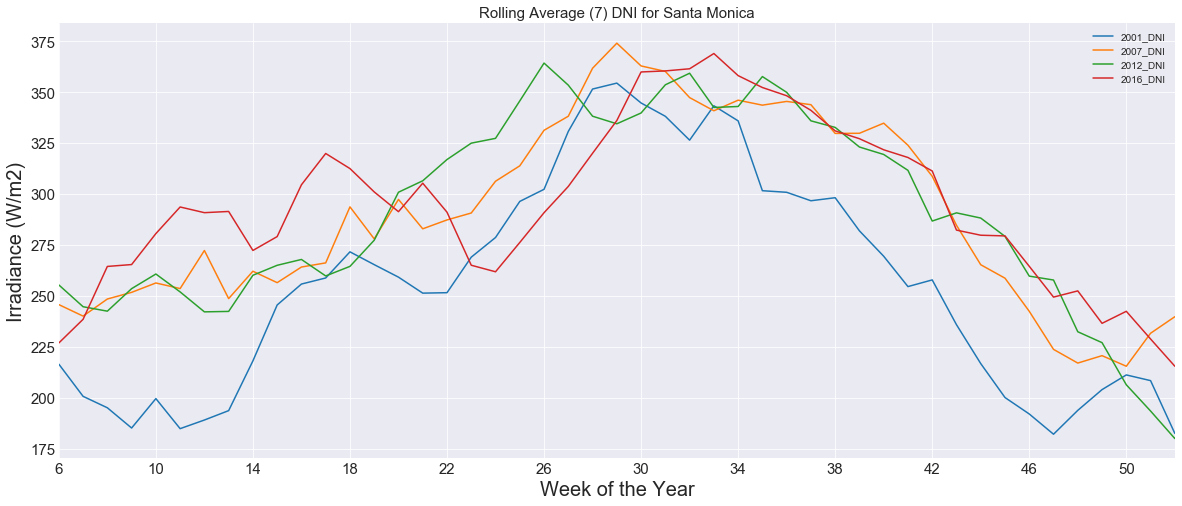

In [26]:
plt.figure(figsize = (20,8))
plt.plot(sm_2001.resample('W').mean()['DNI'].rolling(7).mean().tolist(), label = '2001_DNI')
plt.plot(sm_2007.resample('W').mean()['DNI'].rolling(7).mean().tolist(), label = '2007_DNI')
plt.plot(sm_2012.resample('W').mean()['DNI'].rolling(7).mean().tolist(), label = '2012_DNI')
plt.plot(sm_2016.resample('W').mean()['DNI'].rolling(7).mean().tolist(), label = '2016_DNI')

plt.ylabel('Irradiance (W/m2)', fontsize = 20)
plt.xlabel('Week of the Year', fontsize = 20)
plt.yticks(fontsize =15)
plt.xticks(np.arange(6,52,4),fontsize =15)
plt.title('Rolling Average (7) DNI for Santa Monica', fontsize = 15)
plt.xlim(6,52)
plt.legend()

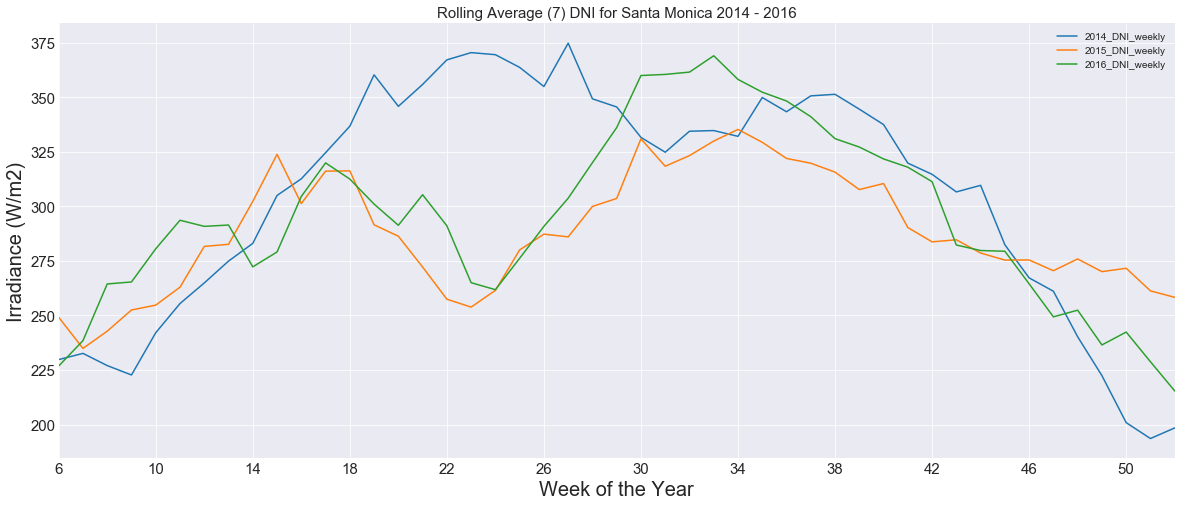

In [27]:
plt.figure(figsize = (20,8))
plt.plot(sm_2014.resample('W').mean()['DNI'].rolling(7).mean().tolist(), label = '2014_DNI_weekly')
plt.plot(sm_2015.resample('W').mean()['DNI'].rolling(7).mean().tolist(), label = '2015_DNI_weekly')
plt.plot(sm_2016.resample('W').mean()['DNI'].rolling(7).mean().tolist(), label = '2016_DNI_weekly')

plt.ylabel('Irradiance (W/m2)', fontsize = 20)
plt.xlabel('Week of the Year', fontsize = 20)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.xticks(np.arange(6,52,4),fontsize =15)
plt.xlim(6,52)
plt.title('Rolling Average (7) DNI for Santa Monica 2014 - 2016', fontsize = 15)
plt.legend()

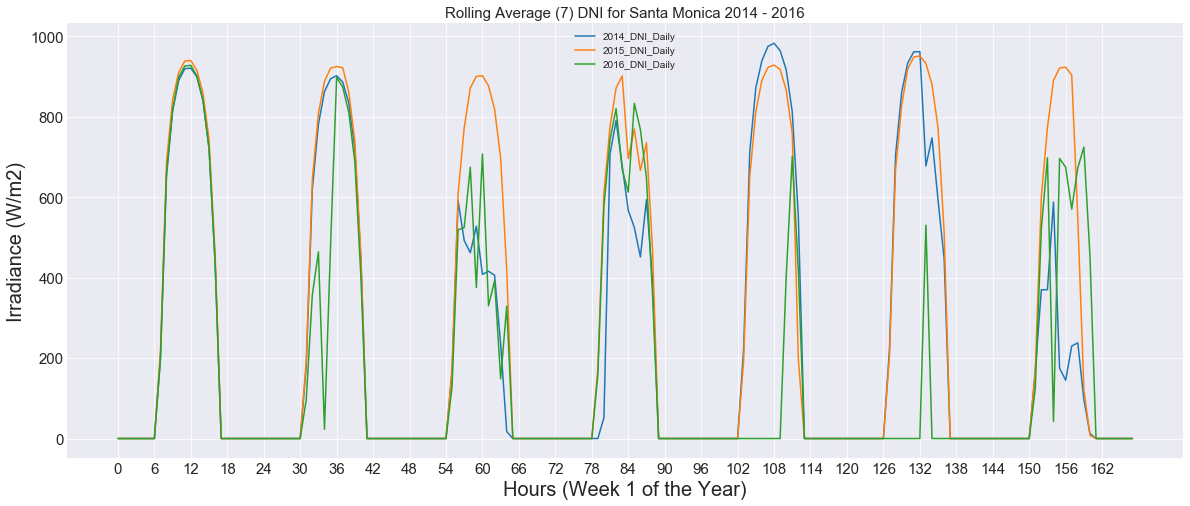

In [32]:
plt.figure(figsize = (20,8))

plt.plot(sm_2014.resample('H')['DNI'].mean().tolist()[:24*7], label = '2014_DNI_Daily')
plt.plot(sm_2015.resample('H')['DNI'].mean().tolist()[:24*7], label = '2015_DNI_Daily')
plt.plot(sm_2016.resample('H')['DNI'].mean().tolist()[:24*7], label = '2016_DNI_Daily')

plt.ylabel('Irradiance (W/m2)', fontsize = 20)
plt.xlabel('Hours (Week 1 of the Year)', fontsize = 20)
plt.yticks(fontsize =15)
plt.xticks(np.arange(0,24*7,6), fontsize =15)
plt.title('Rolling Average (7) DNI for Santa Monica 2014 - 2016', fontsize = 15)
plt.legend()

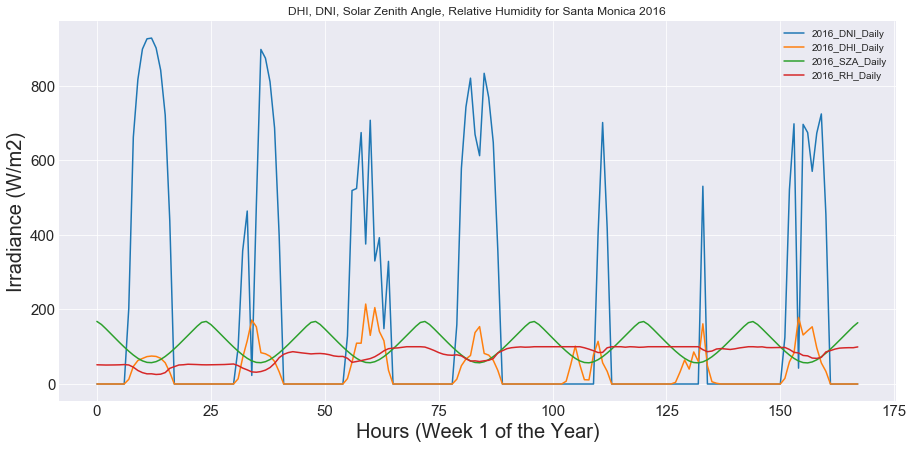

In [34]:
plt.figure(figsize = (15,7))

plt.plot(sm_2016.resample('H')['DNI'].mean().tolist()[:24*7], label = '2016_DNI_Daily')
plt.plot(sm_2016.resample('H')['DHI'].mean().tolist()[:24*7], label = '2016_DHI_Daily')
plt.plot(sm_2016.resample('H')['Solar Zenith Angle'].mean().tolist()[:24*7], label = '2016_SZA_Daily')
plt.plot(sm_2016.resample('H')['Relative Humidity'].mean().tolist()[:24*7], label = '2016_RH_Daily')

plt.ylabel('Irradiance (W/m2)', fontsize = 20)
plt.xlabel('Hours (Week 1 of the Year)', fontsize = 20)
plt.yticks(fontsize =15)
plt.xticks(fontsize =15)
plt.title('DHI, DNI, Solar Zenith Angle, Relative Humidity for Santa Monica 2016')
plt.legend()

In [35]:
df = sm_2016.copy()

cloud_dict = {
    0.0: 'Clear',
    1.0: 'Probably Clear',
    2.0: 'Fog',
    3.0: 'Water',
    4.0: 'Super Cooled Water',
    5.0: 'Mixed',
    6.0: 'Opaque Ice',
    7.0: 'Cirrus',
    8.0: 'Overlapping',
    9.0: 'Overshooting',
    10.0: 'Unknown',
    11.0: 'Dust',
    12.0: 'Smoke'
}

df['Cloud Type'] = df['Cloud Type'].map(cloud_dict)

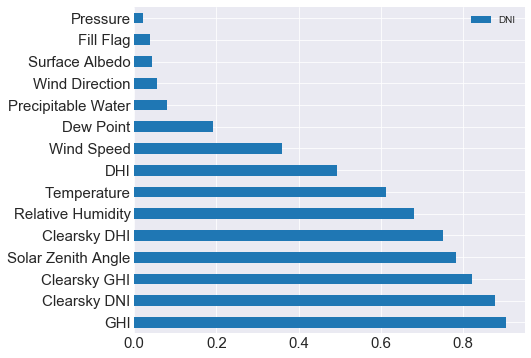

In [36]:
df.corr()[['DNI']].abs().sort_values(by='DNI', ascending = False).drop('DNI', axis = 0).plot(kind = 'barh', figsize = (7,6), fontsize = 15)

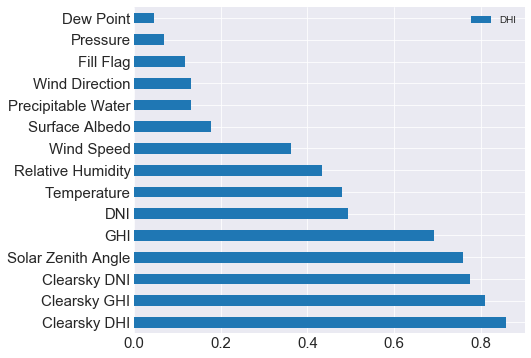

In [37]:
df.corr()[['DHI']].abs().sort_values(by='DHI', ascending = False).drop('DHI', axis = 0).plot(kind = 'barh', figsize = (7,6), fontsize = 15)

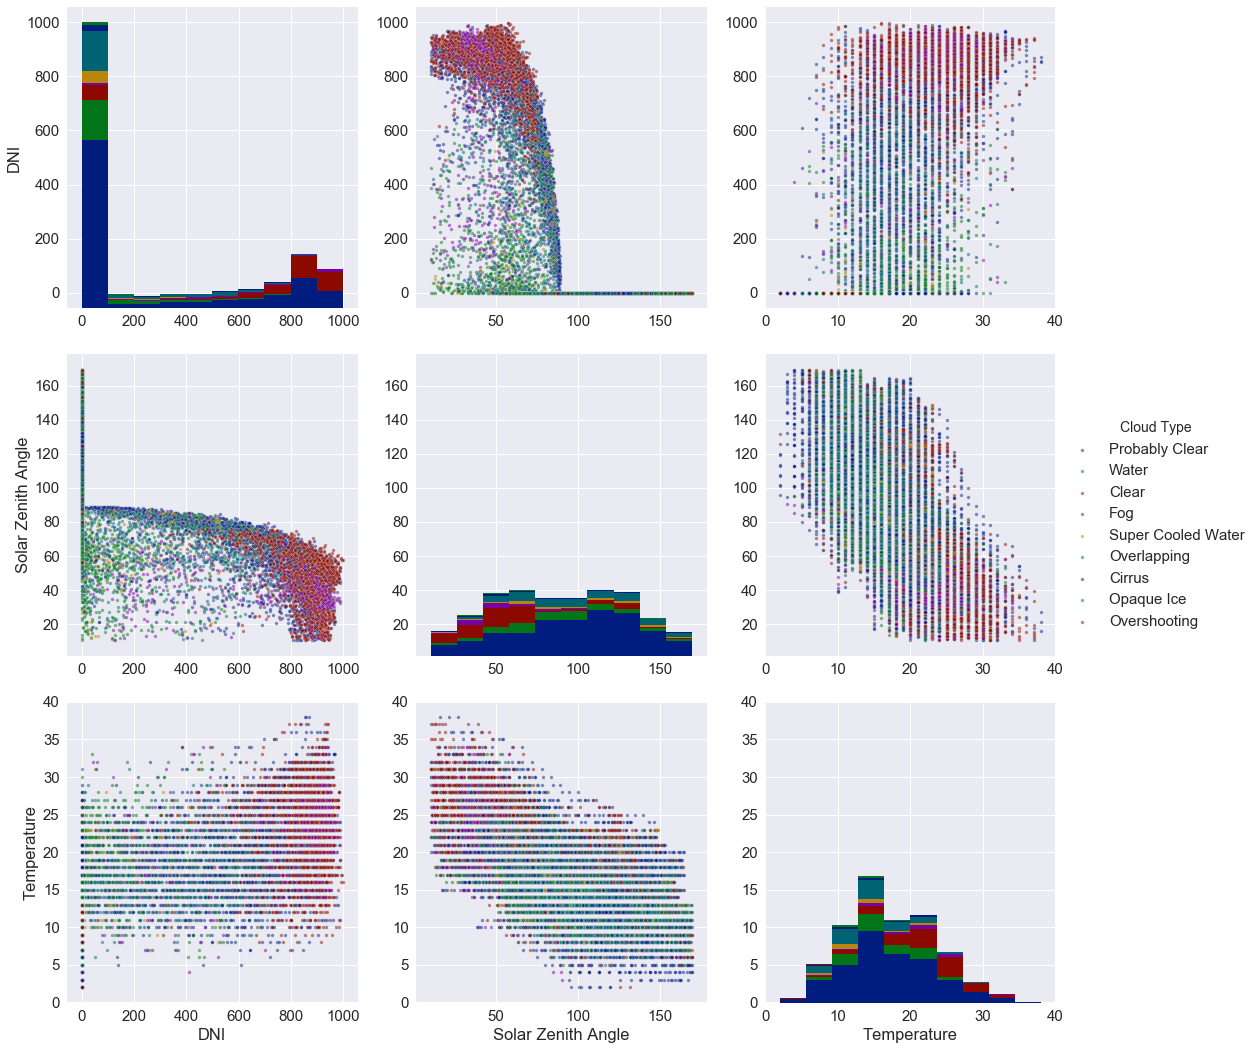

In [56]:
sns.set(font_scale=1.5)
sns.pairplot(df, hue = 'Cloud Type', vars = ['DNI','Solar Zenith Angle', 'Temperature'], size = 5,
            kind='scatter', markers ='.', plot_kws={'alpha': 0.5}, palette = 'dark')

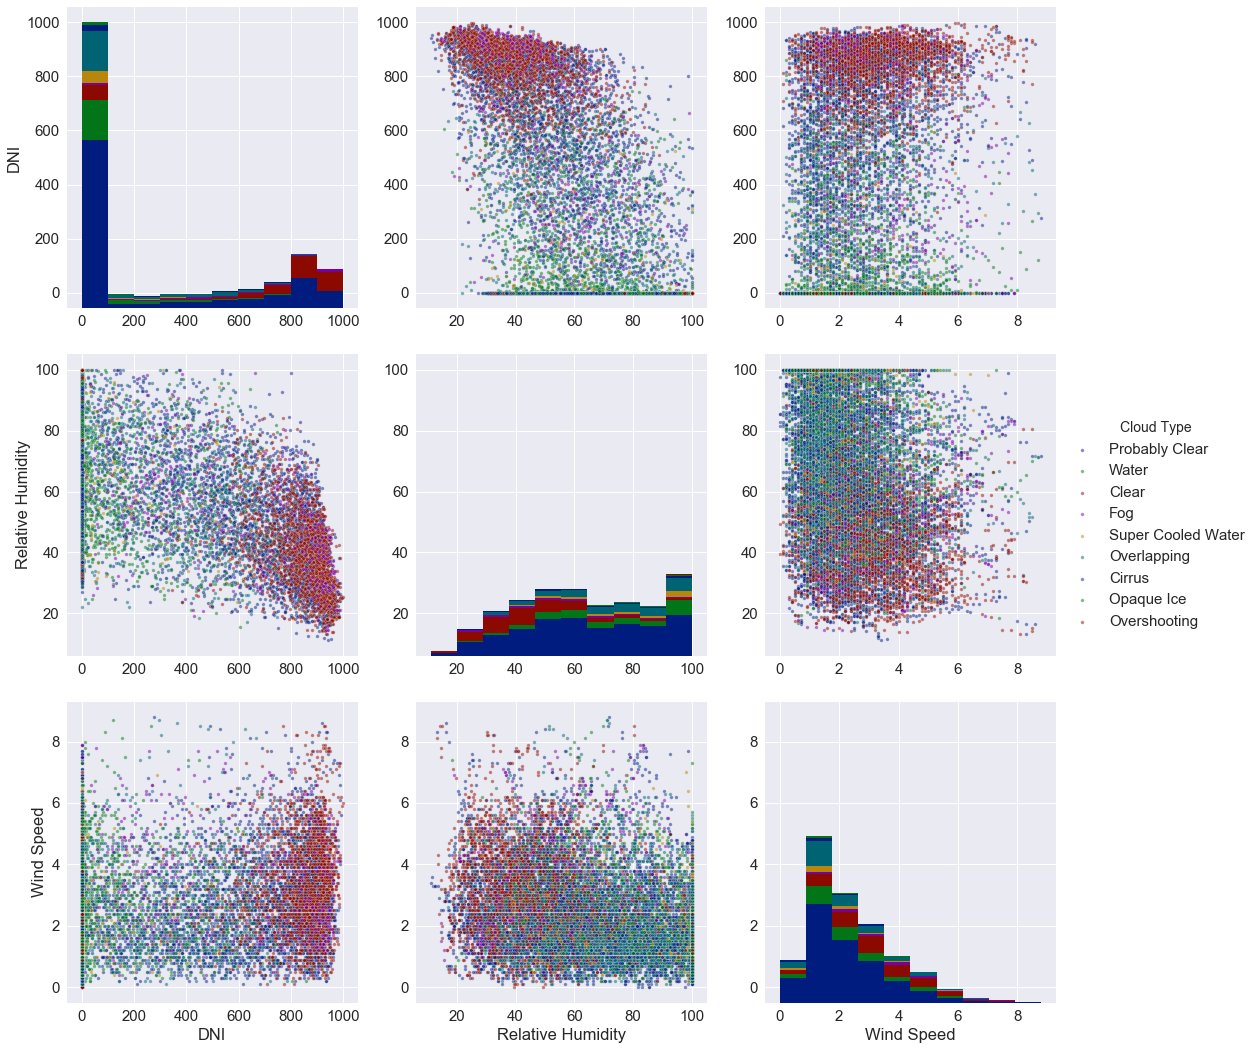

In [57]:
sns.set(font_scale=1.5)
sns.pairplot(df, hue = 'Cloud Type', vars = ['DNI','Relative Humidity', 'Wind Speed'], size = 5,
            kind='scatter', markers ='.', plot_kws={'alpha': 0.5}, palette = 'dark')

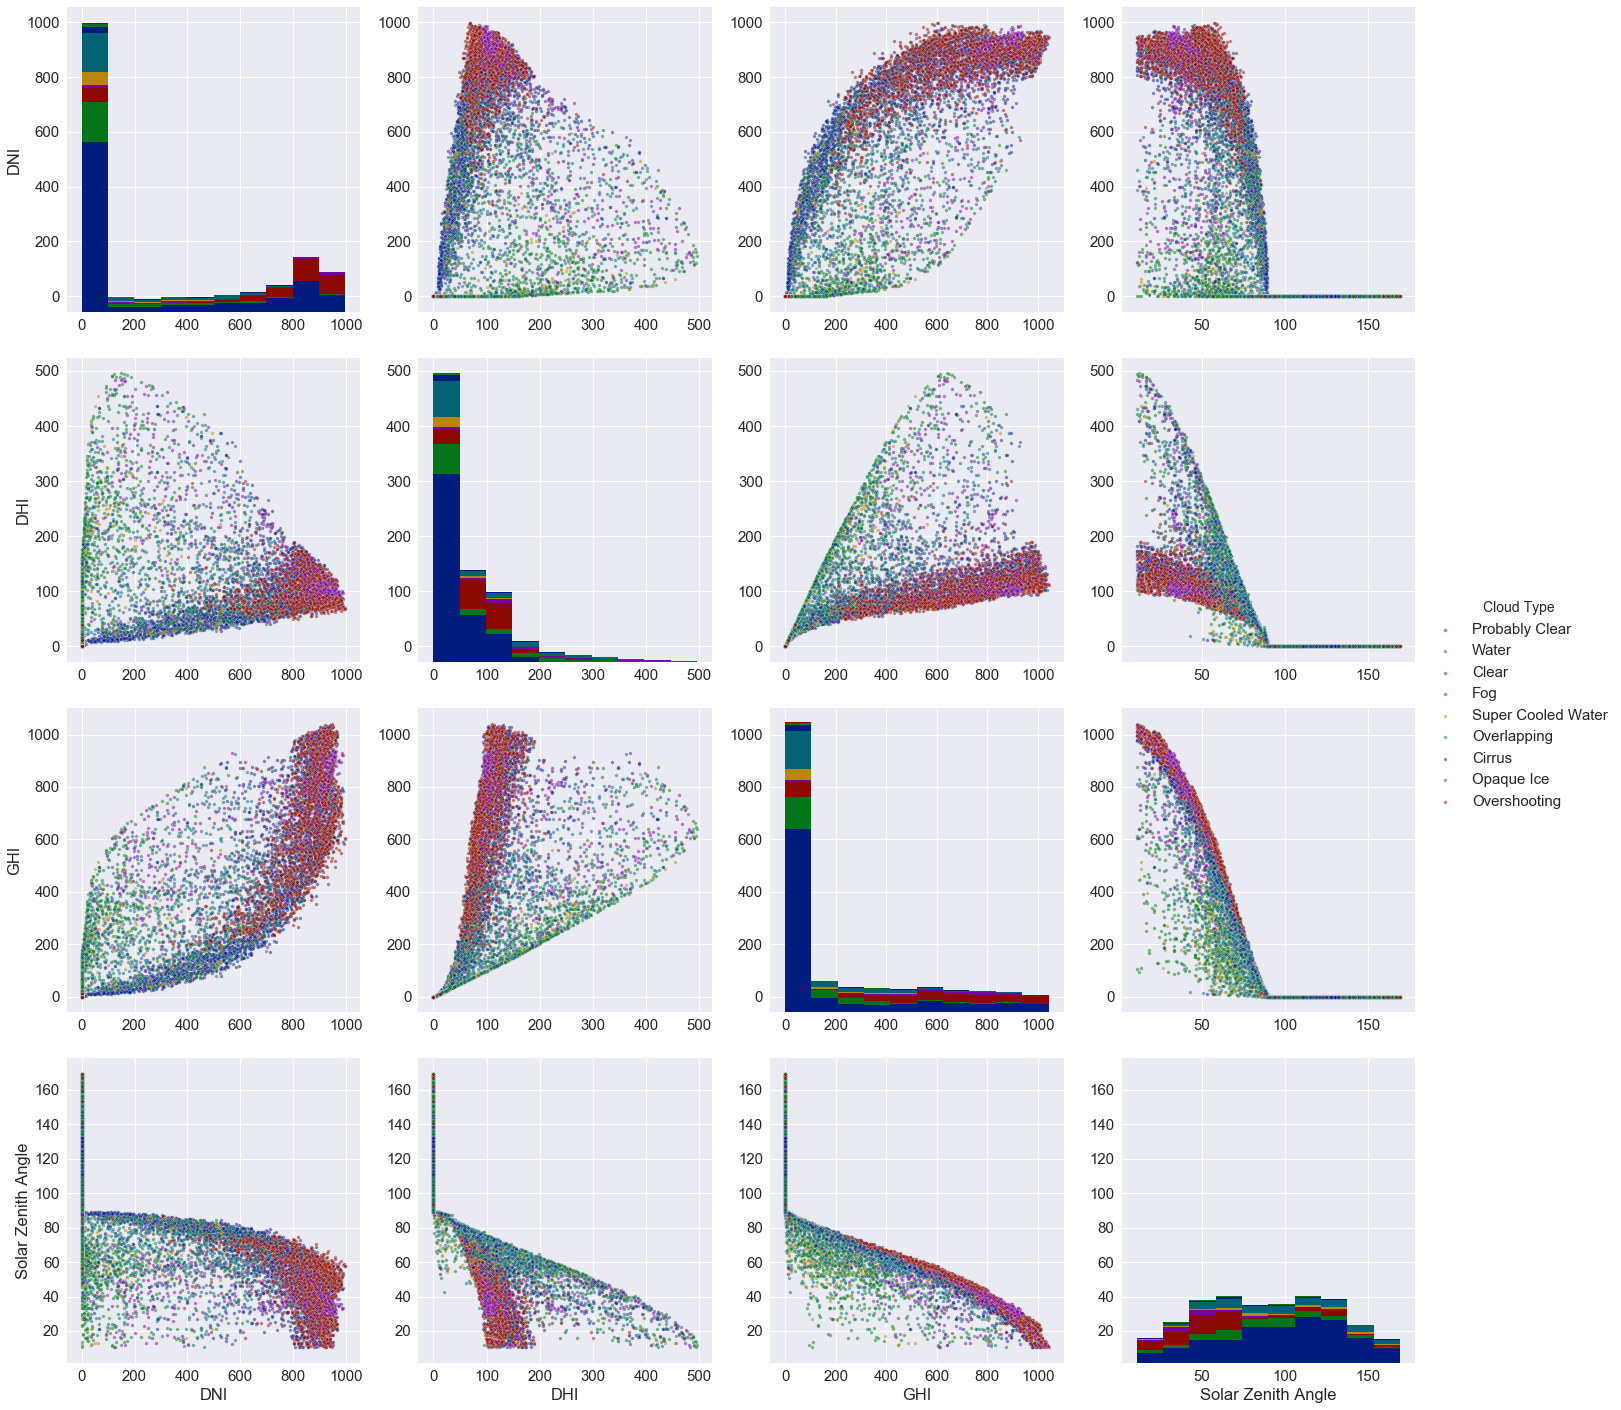

In [59]:
sns.set(font_scale=1.5)
sns.pairplot(df, hue = 'Cloud Type', vars = ['DNI','DHI', 'GHI', 'Solar Zenith Angle'], size = 5,
            kind='scatter', markers ='.', plot_kws={'alpha': 0.5}, palette = 'dark')

### EDA Part 2 - OpenPV Data

In [71]:
temp_df = pd.read_csv('./data_openpv/openpv_CA.csv')

temp2_df = temp_df.loc[~temp_df['reported_annual_energy_prod'].isnull(),:].copy()
temp2_df.head()

/Users/robertmanriquez/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (2,4,5,8,10,12,13,14,15,16,23,25,26,27,28,50) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


state date_installed                   incentive_prog_names type  size_kw  \
234    CA     11/24/2008            City of Palo Alto Utilities  uir  2.96681   
235    CA     01/12/2009            City of Palo Alto Utilities  uir  3.29957   
301    CA     06/22/2009  Sacramento Municipal Utility District  uir     2.34   
302    CA     09/22/2009  Sacramento Municipal Utility District  uir     1.98   
303    CA     04/20/2010  Sacramento Municipal Utility District  uir     5.06   

    appraised  zipcode install_type                  installer  cost_per_watt  \
234       NaN  94306.0  residential  Renewable Power Solutions       8.392297   
235       NaN  94306.0  residential                     Regrid       8.864054   
301       NaN  94203.0  residential         Future Energy Corp      12.927350   
302       NaN  94203.0  residential               Beulter Corp       8.191919   
303       NaN  94203.0  residential              Werner & Sons       7.687747   

       ...    new_constr  effic_1 cust_county tracking inv_model_clean  \
234    ...           NaN      NaN         NaN      NaN             NaN   
235    ...           1.0      NaN         NaN      NaN             NaN   
301    ...           NaN      NaN         NaN      NaN             NaN   
302    ...           NaN      NaN         NaN      NaN             NaN   
303    ...           NaN      NaN         NaN      NaN             NaN   

    mod_cost_real inv_cost_real bos_powerclerk_real  permitting_real  3rdparty  
234           NaN           NaN                 NaN              NaN       NaN  
235           NaN           NaN                 NaN              NaN       NaN  
301           NaN           NaN                 NaN              NaN       NaN  
302           NaN           NaN                 NaN              NaN       NaN  
303           NaN           NaN                 NaN              NaN       NaN  

[5 rows x 81 columns]

In [72]:
temp2_df.shape

(27668, 81)

In [73]:
temp2_df = temp2_df.loc[(temp2_df['date_installed'].str.contains('2015')),:].copy()

prod_df = temp2_df[['size_kw','annual_insolation','annual_PV_prod','reported_annual_energy_prod']].dropna()

prod_df['diff'] = prod_df['annual_PV_prod'] - prod_df['reported_annual_energy_prod']

prod_df['P_diff'] = -(100*(prod_df['annual_PV_prod'] - prod_df['reported_annual_energy_prod'])/ prod_df['annual_PV_prod'])

prod_df.loc[:,['annual_PV_prod', 'reported_annual_energy_prod','P_diff']].head(15)

annual_PV_prod  reported_annual_energy_prod     P_diff
15913     4095.994922                       3203.0 -21.801661
15914    19401.350800                      17836.0  -8.068257
15915     7323.340020                       6698.0  -8.539000
15916     5936.444380                       5566.0  -6.240173
15917     7722.824221                       6784.0 -12.156488
15964     6449.677187                       6523.0   1.136845
15965    10275.970340                      11112.0   8.135773
16086     7352.221936                       6660.0  -9.415139
16087     6162.525051                       6100.0  -1.014601
16088     7546.975439                       7796.0   3.299660
16158   637394.371200                     617733.0  -3.084648
16273    10300.781250                       8016.0 -22.180660
19863     7157.834566                       7306.0   2.069976
19869    10199.160160                       8293.0 -18.689384
19873     8844.752448                       9166.0   3.632069

In [74]:
temp2_df.shape

(9010, 81)

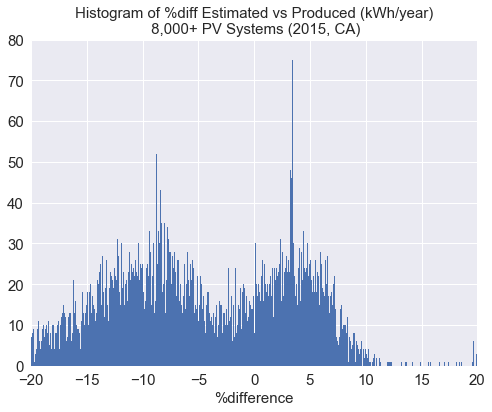

In [75]:
prod_df['P_diff'].hist(bins = 3000, figsize = (8,6))
plt.title('Histogram of %diff Estimated vs Produced (kWh/year)\n 8,000+ PV Systems (2015, CA)', fontsize = 15)
plt.xlabel('%difference', fontsize = 15)
plt.xlim(-20,20)
plt.ylim(0,80)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

In [76]:
from sklearn.metrics import r2_score

r2_score(prod_df['reported_annual_energy_prod'], prod_df['annual_PV_prod'])

0.5524777907882239

In [86]:
temp2_df.shape

(27668, 81)

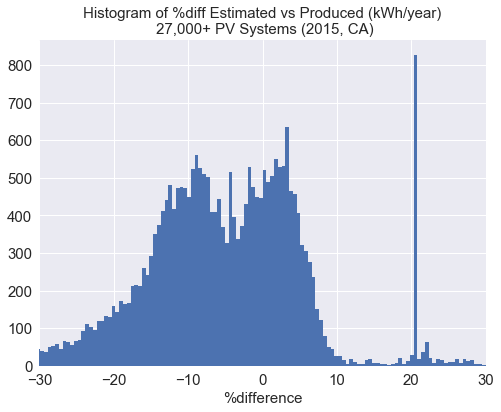

In [87]:
temp2_df = temp_df.loc[~temp_df['reported_annual_energy_prod'].isnull(),:].copy()

prod_df = temp2_df[['size_kw','annual_insolation','annual_PV_prod','reported_annual_energy_prod']].dropna()

prod_df['diff'] = prod_df['annual_PV_prod'] - prod_df['reported_annual_energy_prod']

prod_df['P_diff'] = -(100*(prod_df['annual_PV_prod'] - prod_df['reported_annual_energy_prod'])/ prod_df['annual_PV_prod'])

# prod_df.loc[:,['annual_PV_prod', 'reported_annual_energy_prod','P_diff']].head(15)

prod_df['P_diff'].hist(bins = 3000, figsize = (8,6))
plt.title('Histogram of %diff Estimated vs Produced (kWh/year)\n 27,000+ PV Systems (2015, CA)', fontsize = 15)
plt.xlabel('%difference', fontsize = 15)
plt.xlim(-30,30)
# plt.ylim(0,80)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.show()

In [84]:
r2_score(prod_df['reported_annual_energy_prod'], prod_df['annual_PV_prod'])

0.8518820693669562